In [101]:
import pandas as pd
data = pd.read_csv('../Kaggle-Optiver_volatility_prediction/abt_v1.csv')
target = data['target']
df = data.drop(['time_id','stock_id','target'],axis=1)
print(df.shape)
df.head()

(428932, 257)


,RV,RV_last_7min,RV_last_3min,TRV,TRV_last_7min,TRV_last_3min,pTRS,pTRS_last_7min,pTRS_last_3min,nTRS,...,size_amax_500,size_std_500,order_count_sum_500,order_count_mean_500,order_count_amax_500,order_count_std_500,ret_trade_sum_500,ret_trade_mean_500,ret_trade_amax_500,ret_trade_std_500
0,0.007263,0.006038,0.004769,0.006818,0.005494,0.004433,0.004749,0.003669,0.003261,0.004892,...,653.0,212.717410,37.0,4.625000,15.0,4.501984,0.001706,0.000213,0.002079,0.001136
1,0.002919,0.002476,0.001070,0.002919,0.002476,0.001070,0.001894,0.001435,0.000625,0.002221,...,1487.0,365.878154,56.0,3.111111,10.0,2.446820,0.001441,0.000080,0.001064,0.000620
2,0.003799,0.003324,0.002453,0.003799,0.003324,0.002453,0.002626,0.002381,0.001714,0.002745,...,191.0,86.886626,27.0,3.857143,14.0,4.670067,0.001331,0.000190,0.000755,0.000643
3,0.003753,0.003105,0.001938,0.003753,0.003105,0.001938,0.002624,0.002108,0.001453,0.002684,...,100.0,38.778860,12.0,2.400000,6.0,2.190890,-0.000235,-0.000047,0.000383,0.000291
4,0.004365,0.003428,0.002169,0.004365,0.003428,0.002169,0.002883,0.002376,0.001520,0.003278,...,200.0,67.568308,16.0,2.285714,4.0,1.253566,-0.002160,-0.000309,0.000248,0.000476


In [129]:
list_drop = df.columns[df.columns.str.endswith('0')].array
list_drop

<PandasArray>
[            'RV_last10', 'log_neg_quotes_last10',        'spread1_last10',
           'OIB1_last10',            'wap_mean_0',             'wap_std_0',
             'wap_dev_0',          'wap12_amin_0',          'wap12_amax_0',
            'ret_amin_0',
 ...
         'size_amax_500',          'size_std_500',   'order_count_sum_500',
  'order_count_mean_500',  'order_count_amax_500',   'order_count_std_500',
     'ret_trade_sum_500',    'ret_trade_mean_500',    'ret_trade_amax_500',
     'ret_trade_std_500']
Length: 202, dtype: object

In [102]:
import numpy as np
 
def PCA(X , num_components):
    
    #if scewed?
#     X = np.log(X+1)
    
    #Step-1
    X_meaned =(X - np.mean(X, axis=0))/np.std(X, axis=0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [103]:
#Get the IRIS dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
# x = data.iloc[:,0:4]
 
#prepare the target
# target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(df , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
# principal_df = principal_df.apply(np.log)
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , target] , axis = 1)

print(principal_df.shape)
principal_df


(428932, 3)


,PC1,PC2,target
0,43.882136,-15.803871,0.006254
1,38.046749,-10.331838,0.002656
2,28.422817,-7.767945,0.003712
3,32.283841,-8.064438,0.005743
4,25.525047,-6.744007,0.005345
...,...,...,...
428927,-3.094049,-0.525773,0.004974
428928,-3.163888,0.994805,0.003272
428929,-3.140872,0.206022,0.004154
428930,-3.067214,-0.964419,0.005483


In [104]:
principal_df[principal_df['PC1']==principal_df['PC1'].max()].head()

,PC1,PC2,target
360241,276.578936,944.607525,0.001918


In [33]:
principal_df[principal_df['PC2']==principal_df['PC2'].max()].head()

,PC1,PC2,target
360241,276.578936,944.607525,0.001918


In [105]:
principal_df.drop(index=360241,inplace=True)
df.drop(index=360241,inplace=True)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

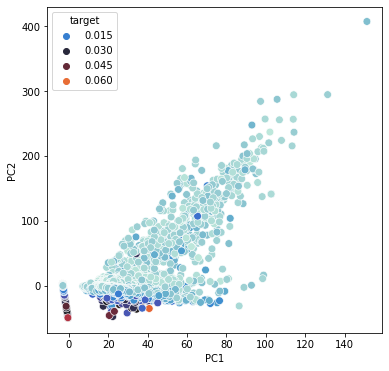

In [106]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [107]:
df_w_pc = pd.concat([principal_df['PC1'] , df] , axis = 1)
print(df_w_pc.shape)

(428931, 258)


In [132]:
wtf = df_w_pc[df_w_pc['PC1']<=0]
# print(wtf.shape)
wtf = wtf.drop(list_drop, axis=1)
wtf = wtf.drop('PC1', axis=1)
wtf.head()

,RV,RV_last_7min,RV_last_3min,TRV,TRV_last_7min,TRV_last_3min,pTRS,pTRS_last_7min,pTRS_last_3min,nTRS,...,OIB1,bid_size12,ask_size12,RV_trade,RV_trade_per_sec,logVol,last_ret,duration,acf,lambda
462,0.003303,0.003058,0.002444,0.003303,0.003058,0.002444,0.002380,0.002201,0.001574,0.002290,...,-0.148998,20.469630,14.988778,0.002028,0.001827,7.630461,0.000128,25.608696,0.269569,1.861604e-06
463,0.003672,0.002946,0.001866,0.003672,0.002946,0.001866,0.002584,0.002031,0.001135,0.002608,...,-0.038047,5.290761,23.808805,0.001768,0.001736,7.336286,0.000579,20.760000,0.249253,1.010716e-06
464,0.006932,0.005749,0.003958,0.006722,0.005493,0.003958,0.004689,0.003807,0.002624,0.004816,...,0.094810,7.286774,7.409293,0.004961,0.006597,9.248503,-0.000909,9.419354,0.189771,6.249279e-07
465,0.007551,0.006722,0.004014,0.006755,0.005813,0.004014,0.004726,0.003978,0.002653,0.004826,...,-0.056270,7.011460,16.531248,0.003370,0.001432,8.028781,-0.001094,17.000000,-0.156404,1.244956e-06
466,0.015584,0.011293,0.006800,0.009245,0.007717,0.005789,0.006417,0.005369,0.004366,0.006656,...,0.193358,12.400418,8.758713,0.008915,0.005641,9.512591,-0.000605,9.015873,0.127031,9.008412e-07


(377190, 3)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

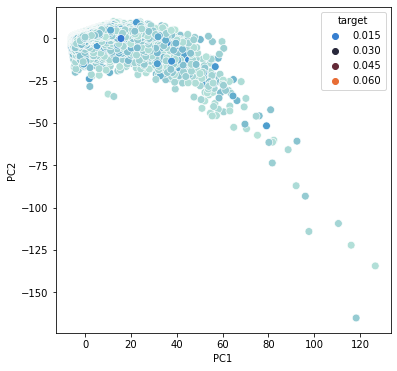

In [134]:
#Applying it to PCA function
mat_reduced = PCA(wtf , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
# principal_df = principal_df.apply(np.log)
 
#Concat it with target variable to create a complete Dataset
principal_df_x1 = principal_df.merge(target, how='inner', left_index=True, right_index=True)
print(principal_df_x1.shape)
# principal_df_x1.head()

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df_x1 , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [136]:
wtf2 = df_w_pc[df_w_pc['PC1']>0]
print(wtf2.shape)
wtf2 = wtf2.drop('PC1', axis=1)
wtf2.head()

# plt.figure(figsize = (6,6))
# sb.scatterplot(data = wtf2 , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

(51741, 258)


,RV,RV_last_7min,RV_last_3min,TRV,TRV_last_7min,TRV_last_3min,pTRS,pTRS_last_7min,pTRS_last_3min,nTRS,...,size_amax_500,size_std_500,order_count_sum_500,order_count_mean_500,order_count_amax_500,order_count_std_500,ret_trade_sum_500,ret_trade_mean_500,ret_trade_amax_500,ret_trade_std_500
0,0.007263,0.006038,0.004769,0.006818,0.005494,0.004433,0.004749,0.003669,0.003261,0.004892,...,653.0,212.717410,37.0,4.625000,15.0,4.501984,0.001706,0.000213,0.002079,0.001136
1,0.002919,0.002476,0.001070,0.002919,0.002476,0.001070,0.001894,0.001435,0.000625,0.002221,...,1487.0,365.878154,56.0,3.111111,10.0,2.446820,0.001441,0.000080,0.001064,0.000620
2,0.003799,0.003324,0.002453,0.003799,0.003324,0.002453,0.002626,0.002381,0.001714,0.002745,...,191.0,86.886626,27.0,3.857143,14.0,4.670067,0.001331,0.000190,0.000755,0.000643
3,0.003753,0.003105,0.001938,0.003753,0.003105,0.001938,0.002624,0.002108,0.001453,0.002684,...,100.0,38.778860,12.0,2.400000,6.0,2.190890,-0.000235,-0.000047,0.000383,0.000291
4,0.004365,0.003428,0.002169,0.004365,0.003428,0.002169,0.002883,0.002376,0.001520,0.003278,...,200.0,67.568308,16.0,2.285714,4.0,1.253566,-0.002160,-0.000309,0.000248,0.000476


(51741, 3)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

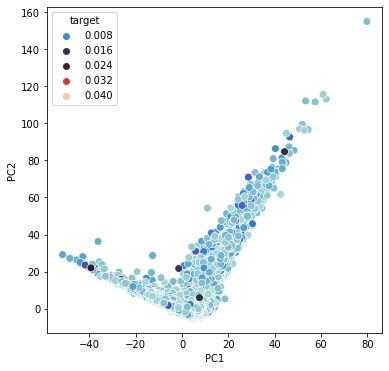

In [137]:
#Applying it to PCA function
mat_reduced = PCA(wtf2 , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
# principal_df = principal_df.apply(np.log)
 
#Concat it with target variable to create a complete Dataset
principal_df_x2 = principal_df.merge(target, how='inner', left_index=True, right_index=True)
print(principal_df_x2.shape)
# principal_df_x1.head()

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df_x2 , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')